In [126]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = pd.merge(city_data_df, ride_data_df, how='outer', on='city')
city_ride_df.head()
# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

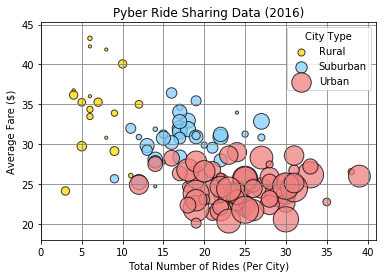

In [129]:
#city_count=city_ride_df.groupby(["city"])["ride_id"].count()
#city_count_df= pd.DataFrame(city_count)
#city_fare=city_ride_df.groupby(["city"])["fare"].mean()
#city_fare_df= pd.DataFrame(city_fare)
#driver_count=city_ride_df.groupby(["city"])["driver_count"].mean()
#driver_count_df= pd.DataFrame(driver_count)
#x_axis = [x for x in city_count]
#y_axis = [y for y in city_fare]



rural_df = city_ride_df.loc[(city_ride_df["type"] == "Rural")]
rural_count=rural_df.groupby(["city"])["ride_id"].count()
rural_fare=rural_df.groupby(["city"])["fare"].mean()
rural_ride_cnt = [x1 for x1 in rural_count]
avg_rural_fare = [y1 for y1 in rural_fare]
ruraldriver_count=rural_df.groupby(["city"])["driver_count"].mean()
ruraldriver_count_df= pd.DataFrame(ruraldriver_count)

suburban_df = city_ride_df.loc[(city_ride_df["type"] == "Suburban")]
suburban_count=suburban_df.groupby(["city"])["ride_id"].count()
suburban_fare=suburban_df.groupby(["city"])["fare"].mean()
suburban_ride_cnt = [x2 for x2 in suburban_count]
avg_suburban_fare = [y2 for y2 in suburban_fare]
suburbandriver_count=suburban_df.groupby(["city"])["driver_count"].mean()
suburbandriver_count_df= pd.DataFrame(suburbandriver_count)

urban_df = city_ride_df.loc[(city_ride_df["type"] == "Urban")]
urban_count=urban_df.groupby(["city"])["ride_id"].count()
urban_fare=urban_df.groupby(["city"])["fare"].mean()
urban_ride_cnt = [x3 for x3 in urban_count]
avg_urban_fare = [y3 for y3 in urban_fare]
urbandriver_count=urban_df.groupby(["city"])["driver_count"].mean()
urbandriver_count_df= pd.DataFrame(urbandriver_count)


plt.xlim(0,city_count_df["ride_id"].max()+2,10)
plt.ylim(18,city_fare_df["fare"].max()+2,10)



plt.scatter(rural_ride_cnt, avg_rural_fare, marker="o", facecolors="gold", edgecolors="black",
            s=10*ruraldriver_count_df, alpha=0.75,label="Rural")

plt.scatter(suburban_ride_cnt, avg_suburban_fare, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=10*suburbandriver_count_df, alpha=0.75,label="Suburban")

plt.scatter(urban_ride_cnt, urban_fare, marker="o", facecolors="lightcoral", edgecolors="black",
            s=10*urbandriver_count_df, alpha=0.75,label="Urban")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best",title="City Type")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid(b=None,which='major',axis='both',color='grey')

# Print our chart to the screen
plt.show()

In [162]:
urban_df["driver_count"].sum()

59602

## Total Fares by City Type

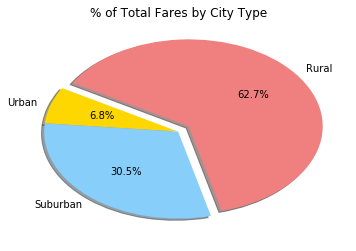

In [165]:
# Calculate Type Percents
total_fare=city_ride_df["fare"].sum()
fare_bycity=round(city_ride_df.groupby(["type"])["fare"].sum(),2)
#fare_bycity_df = pd.DataFrame(fare_bycity)
fare = [f for f in fare_bycity]

city_type=city_ride_df["type"].unique() 
#city_df = pd.DataFrame(city_type)
type = [c for c in city_type]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]


# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0,0.1)
plt.pie(fare,  labels=type, explode = explode,colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("fares_bycityType.png")
# Show Figure
plt.show()

## Total Rides by City Type

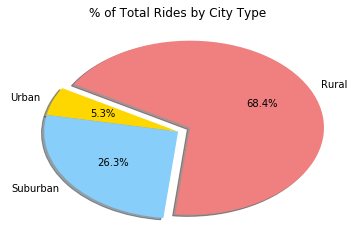

In [164]:
# Calculate Ride Percents
total_ride_cnt = city_ride_df["ride_id"].count()

ride_bycity=round(city_ride_df.groupby(["type"])["ride_id"].count(),2)
ride = [r for r in ride_bycity]

city_type=city_ride_df["type"].unique() 
type = [c for c in city_type]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]


# Build Pie Chart
explode = (0,0,0.1)
plt.pie(ride,  labels=type, explode = explode,colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("rides_bycityType.png")
# Show Figure
plt.show()

## Total Drivers by City Type

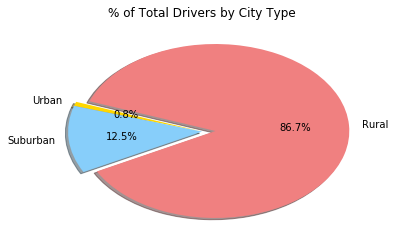

In [166]:
# Calculate Driver Percents
total_driver_cnt = city_ride_df["driver_count"].sum()

driver_bycity=round(city_ride_df.groupby(["type"])["driver_count"].sum(),2)
driver = [r for r in driver_bycity]

city_type=city_ride_df["type"].unique() 
type = [c for c in city_type]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Build Pie Chart
explode = (0,0,0.1)
plt.pie(driver,  labels=type, explode = explode,colors=colors,autopct="%1.1f%%", shadow=True, startangle=160)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("drivers_bycityType.png")

# Show Figure
plt.show()

In [167]:
driver_bycity

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64